# Basic probability

Python activities to complement Measurements and their Uncertainties, Chapter 3, "Uncertainties as probabilities." 

Author: J. S. Dodge, 2019

* [Preliminaries](#Preliminaries)
* [Probability calculations](#Probability-calculations)
* [The Poisson distribution](#The-Poisson-distribution)
* [The central limit theorem](#The-central-limit-theorem)
* [Summary](#Summary)
* [Further reading](#Further-reading)

## Preliminaries
Before proceeding with this notebook you should review the topics from the [previous notebook](2.0-Basic-statistics.ipynb) and read *MU* Ch. 3, "Uncertainties as probabilities," with the following [goals](https://wiki.its.sfu.ca/departments/phys-students/index.php/Reading_goals_for_Hughes_and_Hase#Uncertainties_as_probabilities) in mind.

1. Be able to explain what a probability distribution function $P_\text{DF}(x)$ represents and why Eqs. (3.1) - (3.6) follow from its definition.
2. Be able to recall and use Eqs. (3.1) - (3.3) to perform simple probability calculations for an arbitrary $P_\text{DF}(x)$, including:
    1. Check that $P_\text{DF}(x)$ is properly normalized, and identify the correct normalization factor if it is not;
    2. Evaluate the expectation value of a function $f(x)$; and
    3. Evaluate the expectation value of the mean and the variance.
3. Be able to recall the definitions (3.7) and (3.8) of the Gaussian probability distribution function and the error function, respectively, and know how to use the error function in simple probability calculations like the one given in Sec. 3.2.2.
4. Be aware of the rules described in Sec. 3.3.2 for rejecting outliers, be able to follow a well-defined procedure for doing so, and be able to suggest alternatives to throwing away data points.
5. Be able to describe the basic properties of a Poisson distribution $P(N;\bar{N})$, including:
    1. its functional form;
    2. the kind of experimental data that will be described by it;
    3. the expectation values of its mean and variance; and
    4. the Gaussian probability distribution that approximates it for $N\rightarrow\infty$.
6. Be able to sketch a Poisson distribution for a given mean and standard deviation, and be able to estimate the mean and standard deviation from the plot of a Poisson distribution.
7. Be able to state the central limit theorem and recognize how it is used to justify the assumption of Gaussian errors in many experiments.

The following code cell includes the usual initialization commands, updated to load the normal distribution object `norm`.

In [ ]:
import numpy as np
from numpy import random
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline

## Probability calculations
scipy library in Python defines several common probability distributions. Consider the normal distribution.

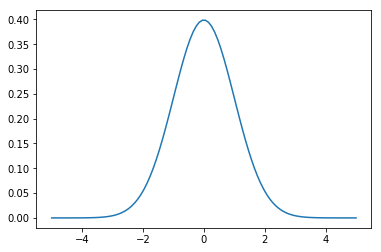

In [55]:
# import normal distribution from scipy
from scipy.stats import norm
# import numpy library and name it "np".
import numpy as np
# import matplotlib.pyplot and name it "plt"
import matplotlib.pyplot as plt

mu = 0
sigma = 1
x = np.linspace(-5, 5, 100)

plt.plot(x, norm.pdf(x, mu, sigma))


Confirm that it is properly normalized. Define normal_distribution_function(x, mu, sigma) as an anonymous function of x, with mu = 0 and sigma = 1 inherited from the earlier assignments.

In [35]:
# quad method computes a definite integral and it is a method in scipy.integrate
from scipy.integrate import quad

# fist we need to define our function
def normal_distribution_function(x, mu, sigma):
    return norm.pdf(x, mu, sigma)
# use quad function to calculate the integral
check_norm, err = quad(normal_distribution_function, -np.inf, np.inf, args=(mu, sigma))
print(np.around(check_norm, decimals=4))

1.0


Confirm that 68% of the area lies in the range $x \in(-\sigma, \sigma)$.

In [56]:
check_area, err = quad(normal_distribution_function, -sigma, sigma, args=(mu, sigma))

print(np.around(check_area, decimals=4))

0.6827


Determine the first two moments. Analytically, the first moment is zero and the second moment is unity. The numerical result for the first moment is nonzero but insignificant.

In [60]:
# defince n-th moment as a function
def func_first_moment(x, mu, sigma, n=1):
    return x**n * norm.pdf(x, mu, sigma)

# set n = 1 for to calculate the first moment
n = 1
first_moment, err = quad(func_first_moment, -np.inf, np.inf, args=(mu, sigma, n))

print(' first moment = ', np.around(first_moment, decimals=4))

# set n = 2 for to calculate the first moment
n = 2
first_moment, err = quad(func_first_moment, -np.inf, np.inf, args=(mu, sigma, n))

print(' second moment = ', np.around(first_moment, decimals=4))

 first moment =  0.0
 second moment =  1.0


## 3.2 The Gaussian probability distribution function
### 3.2.1 Probability calculations
Hughes and Hase define the error function differently from Python and other standard references. In Python the function defined by (3.8) is called the normal cumulative distribution function, and is given by the function norm.cdf. The more common notation is
$$ \Phi(x; \bar{x}, \sigma) \equiv \frac{1}{\sigma \sqrt{2\pi}} \int^{x_1}_{-\infty} \exp [-\frac{(x-\bar{x})^2}{2\sigma^2}] d x
$$

the *error function* is defined (usually) as,
$$
\text{erf}{(x)} \equiv \frac{2}{\sqrt{\pi}}\int^{x}_{0}e^{-t^2}dt,
$$
and is realted to $\Phi(x; \bar{x}, \sigma)$ (or $\text{Erf}(x;\bar{x}, \sigma) $ in the notation of Hughes and Hase) by
$$
\Phi(x; \bar{x}, \sigma) = \frac{1}{2}[1 - \text{erf}(\frac{-(x-\bar{x})}{\sigma\sqrt{2}}) ]
$$

Check:

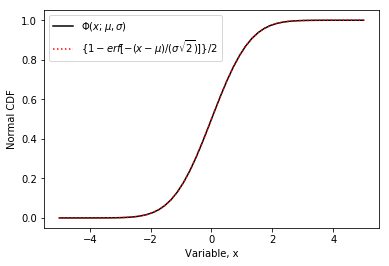

In [38]:
# import the essential methods
from scipy.special import erf

import matplotlib.pyplot as plt

# plot the two fucntions
plt.plot(x, norm.cdf(x, mu, sigma), 'k-', x, (1/2) * (1 - erf(-(x-mu)/(sigma*np.sqrt(2)))), 'r:')
# set the labels
plt.xlabel('Variable, x')
plt.ylabel('Normal CDF')
# plt.legend([r'$\Phi(x;\mu,\sigma)$', r'$\{1 - erf[-(x-\mu)/(\sigma\surd{2})]\}/2$'])
plt.legend([r'$\Phi(x;\mu,\sigma)$', '$\{1 - erf[-(x-\mu)/(\sigma\sqrt{2})]\}/2$'])

## 3.3 Confidence limits and error bars
Check (3.10) using normcdf.

In [39]:
one_sigma_frac = norm.cdf(mu+sigma, mu, sigma) - norm.cdf(mu-sigma, mu, sigma)
print(np.around(one_sigma_frac, decimals=4))

0.6827


Alternatively, use $\text{erf}$. The symmetry $\text{erf}{(x)} = \text{erf}{(-x)} $ allows simplification:

$$P = \Phi(\bar{x}+\sigma; \bar{x}, \sigma) - \Phi(\bar{x}-\sigma; \bar{x}, \sigma) =\text{erf}{(\frac{1}{\sqrt2})}$$

In [40]:

print(np.around(erf(1/np.sqrt(2)), decimals=4))

0.6827


### 3.3.1 Extended ranges
Check Table 3.1. 

In [61]:
range_in_sigma = [1, 1.65, 2, 2.58, 3]
frac_percent = erf(range_in_sigma/np.sqrt(2))*100
print(np.around(range_in_sigma, decimals=4), np.around(frac_percent, decimals=4))

[1.   1.65 2.   2.58 3.  ] [68.2689 90.1057 95.45   99.012  99.73  ]


### 3.3.2 Rejecting outliers
### 3.3.3 Experimental example of a Gaussian distribution
### 3.3.4 Comparing experimental results with an accepted value
### Poisson probability function for discrete events 

The Scipy function poisson.pmf returns the Poisson distribution function.
Reproduce Fig. 3.5.

Text(7.5, 0.3, '(a)')

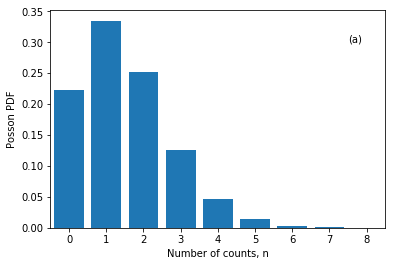

In [63]:
from scipy.stats import poisson
# define variables
n = range(8)
n_bar = 1.5
# generate a Poisson distribution
p = poisson.pmf(n, n_bar)

plt.bar(n, p)
plt.xlim([-0.5, 8.5])
plt.xlabel('Number of counts, n')
plt.ylabel('Posson PDF')
plt.text(7.5, 0.3, '(a)')

Text(37, 0.08, '(b)')

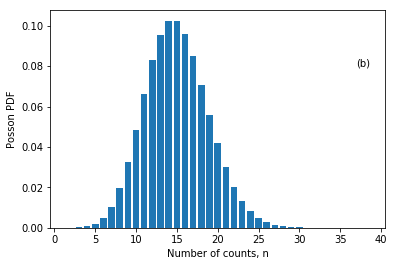

In [43]:
# define variables
n = range(40)
n_bar = 15
# generate a poisson distribution
p = poisson.pmf(n, n_bar)

plt.bar(n, p)

plt.xlim([-0.5, 40.5])
plt.xlabel('Number of counts, n')
plt.ylabel('Posson PDF')
plt.text(37, 0.08, '(b)')

### 3.4.1 Worked example - Poisson counts
### 3.4.2 Error bars and confidence limits for Poisson statistics
### 3.4.3 Approximations for higher means
### 3.5 The central limit theorem
### 3.5.1 Examples of the central limit theorem
Reproduce the top row of Fig. 3.7. The left-most plot is the PDF for a uniform distribution over (0,1).

Text(0, 0.5, 'Probability Density, f(x)')

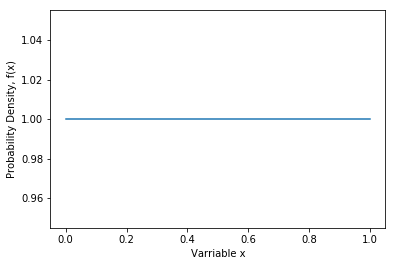

In [44]:
x_var = np.linspace(0, 1, 100)
f = np.ones(x_var.shape)

plt.plot(x_var, f)
plt.xlabel('Varriable x')
plt.ylabel('Probability Density, f(x)')

The center plot is a histogram of 1000 trials.

Text(0, 0.5, 'Occurrence')

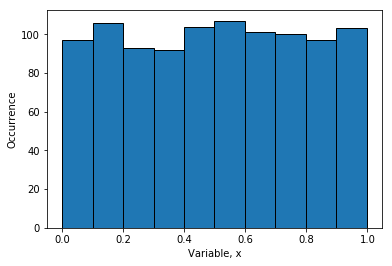

In [45]:
np.random.seed(1)

x = np.random.rand(1000)

plt.hist(x, 10, ec='black')
plt.xlabel('Variable, x')
plt.ylabel('Occurrence')

The right-most plot is a histogram of 1000 trials, where the result of each trial is the mean of five numbers drawn from the uniform distribution. To simplify the computation, note that the mean function operates independently on the columns of an array.

Text(0, 0.5, 'Occurrence')

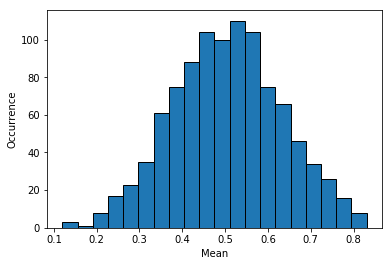

In [64]:
# generage a 5 x 1000 matrix of random numbers
x = np.random.rand(5, 1000)
# calulate the mean value of each column
x_bar = np.mean(x, axis=0)

plt.hist(x_bar, 20, ec='black')
plt.xlabel('Mean')
plt.ylabel('Occurrence')

Let's look at how this evolves from N=2 to N=5, using 10,000 trials to get better statistics.

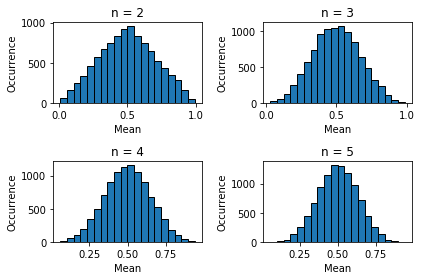

In [47]:
n_start = 2
n_end = 5 + 1
trials = 10000


for i in range(n_start, n_end):

    plt.subplot(2, 2, i - n_start  + 1)

    x = np.random.rand(i, trials)
    x_bar = np.mean(x, axis=0)

    plt.hist(x_bar, 20, ec='black')
    plt.xlabel('Mean')
    plt.ylabel('Occurrence')
    plt.title('n = ' + str(i))
# adjust spacing between subplots to minimize the overlaps
plt.tight_layout()



### Exercises
#### 1 - Exercise (3.2)
#### 2 - Exercise (3.5)
#### 3 - Exercise (3.8)